# Importing of dataset

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt


In [3]:
#upload the local dataset (CSV File)
from google.colab import files
uploaded = files.upload()

Saving Olympian Bio and Medal Results.csv to Olympian Bio and Medal Results.csv


# Data processing

In [4]:
#From CSV file
csvFile = "Olympian Bio and Medal Results.csv"
csv_data = pd.read_csv(csvFile)
csv_data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
#extracting the desired columns
csv_raw = pd.DataFrame(csv_data[["Sex","Age","Height","Weight","Team","Sport","Medal"]])
csv_raw.head()

,Sex,Age,Height,Weight,Team,Sport,Medal
0,M,24.0,180.0,80.0,China,Basketball,NaN
1,M,23.0,170.0,60.0,China,Judo,NaN
2,M,24.0,NaN,NaN,Denmark,Football,NaN
3,M,34.0,NaN,NaN,Denmark/Sweden,Tug-Of-War,Gold
4,F,21.0,185.0,82.0,Netherlands,Speed Skating,NaN


In [6]:
#replacing the gold, silver, and broze medals as 1
csv_raw["Medal"] = csv_raw["Medal"].map({'Gold': 1, 'Silver': 1, 'Bronze': 1})

#replacing all NaN values in the "Medal" column with 0
csv_raw["Medal"] = csv_raw.Medal.fillna(0)

#to check
csv_raw

,Sex,Age,Height,Weight,Team,Sport,Medal
0,M,24.0,180.0,80.0,China,Basketball,0.0
1,M,23.0,170.0,60.0,China,Judo,0.0
2,M,24.0,NaN,NaN,Denmark,Football,0.0
3,M,34.0,NaN,NaN,Denmark/Sweden,Tug-Of-War,1.0
4,F,21.0,185.0,82.0,Netherlands,Speed Skating,0.0
...,...,...,...,...,...,...,...
271111,M,29.0,179.0,89.0,Poland-1,Luge,0.0
271112,M,27.0,176.0,59.0,Poland,Ski Jumping,0.0
271113,M,27.0,176.0,59.0,Poland,Ski Jumping,0.0
271114,M,30.0,185.0,96.0,Poland,Bobsleigh,0.0


In [7]:
#removing rows with empty cells
csv_data = csv_raw.dropna()
csv_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 206165 entries, 0 to 271115
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Sex     206165 non-null  object 
 1   Age     206165 non-null  float64
 2   Height  206165 non-null  float64
 3   Weight  206165 non-null  float64
 4   Team    206165 non-null  object 
 5   Sport   206165 non-null  object 
 6   Medal   206165 non-null  float64
dtypes: float64(4), object(3)
memory usage: 12.6+ MB


In [8]:
#change the "Medal" column to categorical type
csv_data["Medal"] = csv_data["Medal"].astype('category')

#verify the change
csv_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 206165 entries, 0 to 271115
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   Sex     206165 non-null  object  
 1   Age     206165 non-null  float64 
 2   Height  206165 non-null  float64 
 3   Weight  206165 non-null  float64 
 4   Team    206165 non-null  object  
 5   Sport   206165 non-null  object  
 6   Medal   206165 non-null  category
dtypes: category(1), float64(3), object(3)
memory usage: 11.2+ MB


<ipython-input-8-2154b03f79f8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  csv_data["Medal"] = csv_data["Medal"].astype('category')


In [9]:
#extracting only the male athletes in Athletics who won medals
data_medals = csv_data[(csv_data.Medal == 1)
              & (csv_data.Sex == "M")
              & (csv_data.Sport == "Athletics")]
data_medals

,Sex,Age,Height,Weight,Team,Sport,Medal
191,M,26.0,182.0,67.0,Spain,Athletics,1.0
620,M,26.0,190.0,125.0,Unified Team,Athletics,1.0
655,M,21.0,160.0,50.0,Ethiopia,Athletics,1.0
720,M,22.0,166.0,58.0,Ethiopia,Athletics,1.0
727,M,19.0,181.0,78.0,Sweden,Athletics,1.0
...,...,...,...,...,...,...,...
270550,M,23.0,190.0,102.0,Hungary,Athletics,1.0
270551,M,27.0,190.0,102.0,Hungary,Athletics,1.0
270552,M,31.0,190.0,102.0,Hungary,Athletics,1.0
270761,M,20.0,175.0,62.0,Italy,Athletics,1.0


In [10]:
#extract data from United States, Jamaica, Kenya, Trinidad and Tobago
clean_data = csv_data[(csv_data.Sex == "M") & ((csv_data.Team == "United States")|
                    (csv_data.Team == "Jamaica")|(csv_data.Team == "Kenya")|
                    (csv_data.Team == "	Trinidad and Tobago"))
                    & (csv_data.Sport == "Athletics")]

# reset the index and drop the old index
clean_data = clean_data.reset_index(drop=True)
clean_data

,Sex,Age,Height,Weight,Team,Sport,Medal
0,M,26.0,183.0,75.0,United States,Athletics,0.0
1,M,23.0,178.0,61.0,United States,Athletics,0.0
2,M,27.0,178.0,61.0,United States,Athletics,0.0
3,M,31.0,178.0,61.0,United States,Athletics,0.0
4,M,35.0,178.0,61.0,United States,Athletics,0.0
...,...,...,...,...,...,...,...
2768,M,23.0,193.0,89.0,United States,Athletics,0.0
2769,M,21.0,180.0,68.0,United States,Athletics,0.0
2770,M,25.0,180.0,68.0,United States,Athletics,0.0
2771,M,31.0,175.0,69.0,United States,Athletics,0.0


In [11]:
clean_data ['Medal'].value_counts()

,count
Medal,
0.0,1851
1.0,922


In [12]:
clean_data_medal = pd.DataFrame(clean_data['Medal'])
clean_data_num = pd.DataFrame(clean_data[['Age', 'Height', 'Weight']])

testSize = 0.2

## Execution of Binary Classification for AGE


In [13]:
#define SEED with 42 for reproducibility
SEED = 42

clean_data_age =pd.DataFrame(clean_data_num['Age'])
ageTrain, ageTest, medalTrain, medalTest = train_test_split(clean_data_age,
                                                            clean_data_medal,
                                                          test_size=testSize,
                                                          random_state=SEED)

In [14]:
deciTreeC = DecisionTreeClassifier()
deciTreeC.fit(ageTrain, medalTrain)

DecisionTreeClassifier()

In [15]:
#get the maximum depth of the tree
treeDepth = deciTreeC.get_depth()

#count the highest number of nodes with no child nodes (leaves)
treeLeavesNumber = deciTreeC.get_n_leaves()
print("Tree Depth: ", treeDepth)
print("Tree number of leaves: ", treeLeavesNumber)


Tree Depth:  11
Tree number of leaves:  28


### Check Predictions (Train Set) for Age

Accuracy  	: 0.5306582506762849
Precision 	: 0.37880032867707475
Recall    	: 0.6179624664879356


<Axes: >

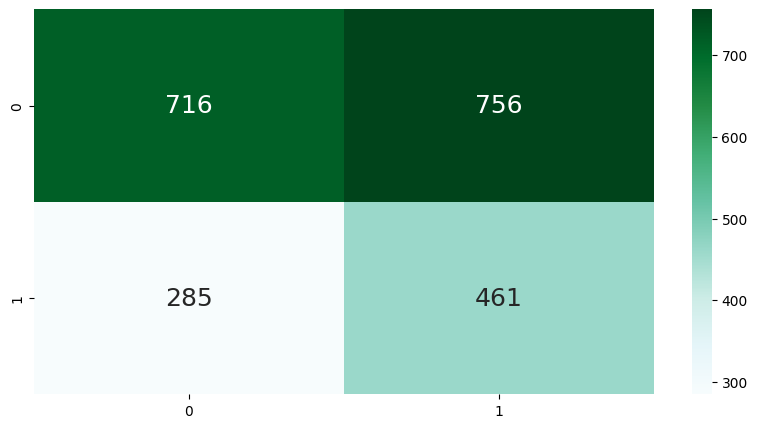

In [16]:
#calculating the accuracy, precision and recall score for the training set
deciTreeC = DecisionTreeClassifier(class_weight = 'balanced')
deciTreeC.fit(ageTrain, medalTrain)
medalTrainPred = deciTreeC.predict(ageTrain)

print("Accuracy  \t:", deciTreeC.score(ageTrain, medalTrain))
print("Precision \t:", precision_score(medalTrain, medalTrainPred, pos_label=1.0))
print("Recall    \t:", recall_score(medalTrain, medalTrainPred, pos_label=1.0))

# Set the figure size for the heatmap
plt.figure(figsize=(10, 5))

# Generate and plot the confusion matrix heatmap
conf_matrix = confusion_matrix(medalTrain, medalTrainPred)
sb.heatmap(conf_matrix, annot=True, fmt="d", annot_kws={"size": 18}, cmap="BuGn")

# Note: In the matrix, '1' represents the 'Y' class and '0' represents the 'N' class;
# the y-axis shows the actual values, and the x-axis shows the predicted values.

### Check Prediction (Test Set) for Age


Accuracy  	: 0.5747747747747748
Precision 	: 0.39864864864864863
Recall    	: 0.6704545454545454


<Axes: >

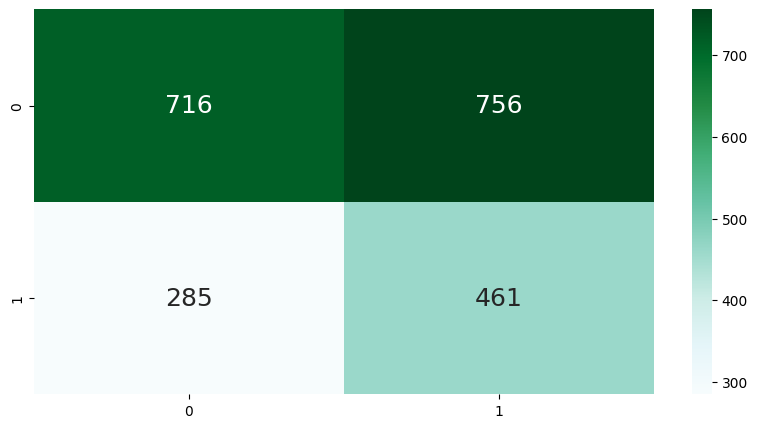

In [17]:
#calculating the accuracy, precision and recall score for the testing set
deciTreeC = DecisionTreeClassifier(class_weight = 'balanced')
deciTreeC.fit(ageTest, medalTest)
medalTestPred = deciTreeC.predict(ageTest)

print("Accuracy  \t:", deciTreeC.score(ageTest, medalTest))
print("Precision \t:", precision_score(medalTest, medalTestPred, pos_label=1.0))
print("Recall    \t:", recall_score(medalTest, medalTestPred, pos_label=1.0))

# Set the figure size for the heatmap
plt.figure(figsize=(10, 5))

# Generate and plot the confusion matrix heatmap
conf_matrix = confusion_matrix(medalTrain, medalTrainPred)
sb.heatmap(conf_matrix, annot=True, fmt="d", annot_kws={"size": 18}, cmap="BuGn")

# Note: In the matrix, '1' represents the 'Y' class and '0' represents the 'N' class;
# the y-axis shows the actual values, and the x-axis shows the predicted values.

### Storing the results in a List

In [18]:
# store values for comparison later, to STORE THE VALUES IN A LIST by using .append
results = []

# Collect values related to training data and append them to the list
train_data_metrics = [
    'Age(Train)',
    round(deciTreeC.score(ageTrain, medalTrain), 2),
    round(precision_score(medalTrain, medalTrainPred, pos_label=1.0), 2),
    round(recall_score(medalTrain, medalTrainPred, pos_label=1.0), 2),
    treeDepth,
    treeLeavesNumber
]
results.append(train_data_metrics)

# Collect values related to test data and append them to the list
test_data_metrics = [
    'Age(Test)',
    round(deciTreeC.score(ageTest, medalTest), 2),
    round(precision_score(medalTest, medalTestPred, pos_label=1.0), 2),
    round(recall_score(medalTest, medalTestPred, pos_label=1.0), 2),
    treeDepth,
    treeLeavesNumber
]
results.append(test_data_metrics)

results

[['Age(Train)', 0.5, 0.38, 0.62, 11, 28],
 ['Age(Test)', 0.57, 0.4, 0.67, 11, 28]]

## Execution of Binary Classification for HEIGHT

Model Performance on Training Set
Accuracy  	: 0.6713255184851218
Precision 	: 0.580952380952381
Recall    	: 0.08176943699731903

Model Performance on Test Set
Accuracy  	: 0.6576576576576577
Precision 	: 0.18181818181818182
Recall    	: 0.022727272727272728



<Axes: >

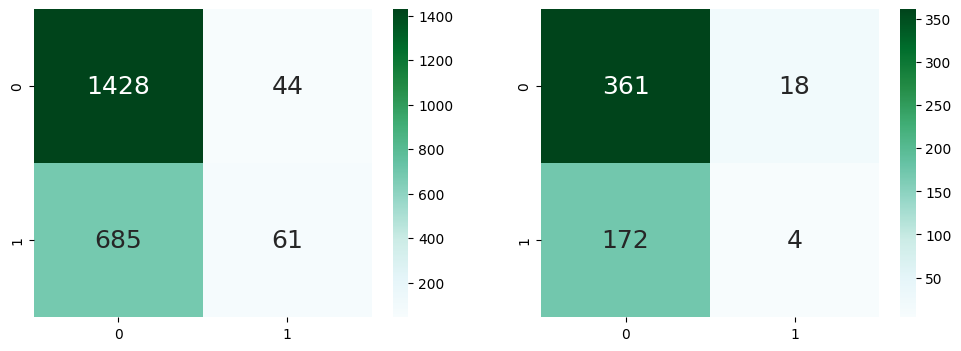

In [19]:
clean_data_height = pd.DataFrame(clean_data_num['Height'])


# Splitting the height data and corresponding medal data into training and testing sets
heightTrain, heightTest, medalTrain, medalTest = train_test_split(clean_data_height,
                                                                      clean_data_medal,
                                                                      test_size=testSize,
                                                                      random_state=SEED)
# Initialization of Decision Tree Classifier
deciTreeC = DecisionTreeClassifier()
deciTreeC.fit(heightTrain, medalTrain)

# Predict the outcomes for both the training and testing datasets
medalTrainPred = deciTreeC.predict(heightTrain)
medalTestPred = deciTreeC.predict(heightTest)

print("Model Performance on Training Set")
print("Accuracy  \t:", deciTreeC.score(heightTrain, medalTrain))
print("Precision \t:", precision_score(medalTrain, medalTrainPred, pos_label=1.0))
print("Recall    \t:", recall_score(medalTrain, medalTrainPred, pos_label=1.0))
print()

print("Model Performance on Test Set")
print("Accuracy  \t:", deciTreeC.score(heightTest, medalTest))
print("Precision \t:", precision_score(medalTest, medalTestPred, pos_label=1.0))
print("Recall    \t:", recall_score(medalTest, medalTestPred, pos_label=1.0))
print()

# Plot the confusion matrices
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(medalTrain, medalTrainPred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0], cmap = "BuGn")
sb.heatmap(confusion_matrix(medalTest, medalTestPred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1], cmap = "BuGn")

In [20]:
treeDepth = deciTreeC.get_depth()
treeLeavesNumber = deciTreeC.get_n_leaves()

print('Depth of the tree:', treeDepth)
print('Number of leaves in the tree:', treeLeavesNumber)

Depth of the tree: 11
Number of leaves in the tree: 44


In [21]:
# Collect values related to training data and append them to the list
train_data_metrics = [
    'Height(Train)',
    round(deciTreeC.score(heightTrain, medalTrain), 2),
    round(precision_score(medalTrain, medalTrainPred, pos_label=1.0), 2),
    round(recall_score(medalTrain, medalTrainPred, pos_label=1.0), 2),
    treeDepth,
    treeLeavesNumber
]
results.append(train_data_metrics)

# Collect values related to test data and append them to the list
test_data_metrics = [
    'Height(Test)',
    round(deciTreeC.score(heightTest, medalTest), 2),
    round(precision_score(medalTest, medalTestPred, pos_label=1.0), 2),
    round(recall_score(medalTest, medalTestPred, pos_label=1.0), 2),
    treeDepth,
    treeLeavesNumber
]
results.append(test_data_metrics)

results

[['Age(Train)', 0.5, 0.38, 0.62, 11, 28],
 ['Age(Test)', 0.57, 0.4, 0.67, 11, 28],
 ['Height(Train)', 0.67, 0.58, 0.08, 11, 44],
 ['Height(Test)', 0.66, 0.18, 0.02, 11, 44]]

## Execution of Binary Classification for WEIGHT

Model Performance on Training Set
Accuracy  	: 0.6794409377817854
Precision 	: 0.5697211155378487
Recall    	: 0.19168900804289543

Model Performance on Test Set
Accuracy  	: 0.6846846846846847
Precision 	: 0.509090909090909
Recall    	: 0.1590909090909091



<Axes: >

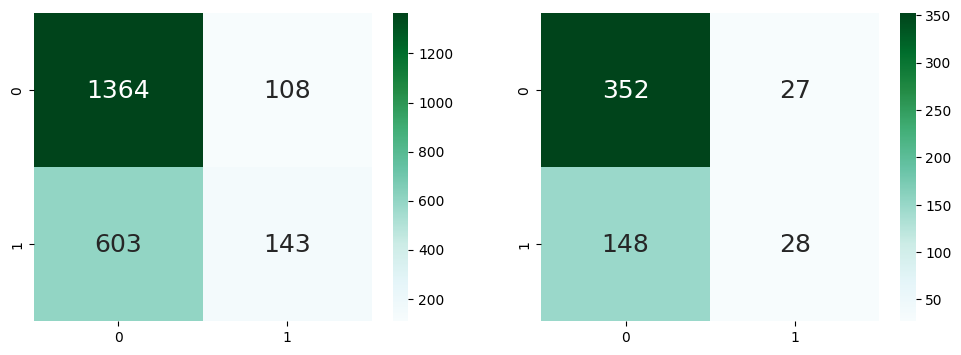

In [22]:
clean_data_weight = pd.DataFrame(clean_data_num['Weight'])

# Splitting the weight data and corresponding medal data into training and testing sets
weightTrain, weightTest, medalTrain, medalTest = train_test_split(clean_data_weight,
                                                                      clean_data_medal,
                                                                      test_size=testSize,
                                                                      random_state=SEED)

# Initialization of Decision Tree Classifier
deciTreeC = DecisionTreeClassifier()
deciTreeC.fit(weightTrain, medalTrain)

# Predict the outcomes for both the training and testing datasets
medalTrainPred = deciTreeC.predict(weightTrain)
medalTestPred = deciTreeC.predict(weightTest)

print("Model Performance on Training Set")
print("Accuracy  \t:", deciTreeC.score(weightTrain, medalTrain))
print("Precision \t:", precision_score(medalTrain, medalTrainPred, pos_label=1.0))
print("Recall    \t:", recall_score(medalTrain, medalTrainPred, pos_label=1.0))
print()

print("Model Performance on Test Set")
print("Accuracy  \t:", deciTreeC.score(weightTest, medalTest))
print("Precision \t:", precision_score(medalTest, medalTestPred, pos_label=1.0))
print("Recall    \t:", recall_score(medalTest, medalTestPred, pos_label=1.0))
print()

# Plot the confusion matrices
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(medalTrain, medalTrainPred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0], cmap = "BuGn")
sb.heatmap(confusion_matrix(medalTest, medalTestPred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1], cmap = "BuGn")

In [23]:
treeDepth = deciTreeC.get_depth()
treeLeavesNumber = deciTreeC.get_n_leaves()

print('Depth of the tree:', treeDepth)
print('Number of leaves in the tree:', treeLeavesNumber)

Depth of the tree: 11
Number of leaves in the tree: 79


In [24]:
# Collect values related to training data and append them to the list
train_data_metrics = [
    'Weight(Train)',
    round(deciTreeC.score(weightTrain, medalTrain), 2),
    round(precision_score(medalTrain, medalTrainPred, pos_label=1.0), 2),
    round(recall_score(medalTrain, medalTrainPred, pos_label=1.0), 2),
    treeDepth,
    treeLeavesNumber
]
results.append(train_data_metrics)

# Collect values related to test data and append them to the list
test_data_metrics = [
    'Weight(Test)',
    round(deciTreeC.score(weightTest, medalTest), 2),
    round(precision_score(medalTest, medalTestPred, pos_label=1.0), 2),
    round(recall_score(medalTest, medalTestPred, pos_label=1.0), 2),
    treeDepth,
    treeLeavesNumber
]
results.append(test_data_metrics)

results

[['Age(Train)', 0.5, 0.38, 0.62, 11, 28],
 ['Age(Test)', 0.57, 0.4, 0.67, 11, 28],
 ['Height(Train)', 0.67, 0.58, 0.08, 11, 44],
 ['Height(Test)', 0.66, 0.18, 0.02, 11, 44],
 ['Weight(Train)', 0.68, 0.57, 0.19, 11, 79],
 ['Weight(Test)', 0.68, 0.51, 0.16, 11, 79]]

## Multi Variate Tree

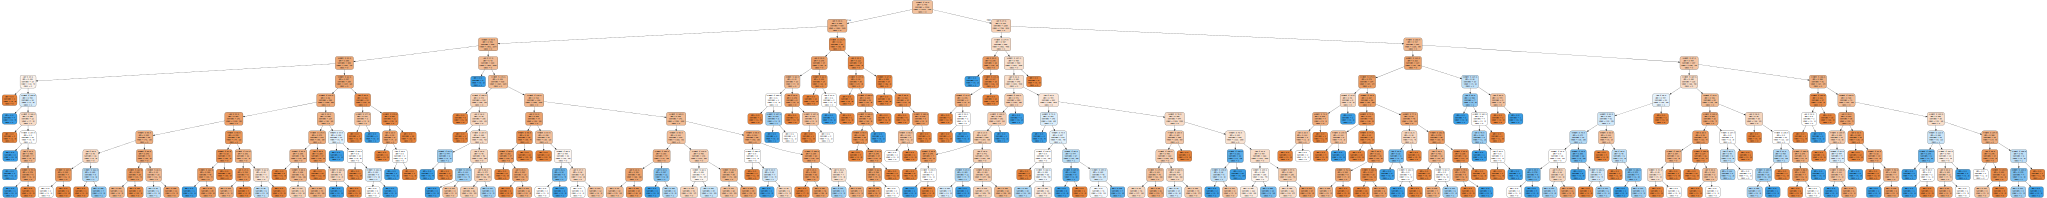

In [25]:
# Visualizing the Decision Tree: we will limit the tree depth to 10 to prevent the computer from hanging
x_train, x_test, y_train, y_test = train_test_split(clean_data_num, clean_data_medal,
test_size = testSize, random_state = SEED)

# Initialization of Decision Tree Classifier with max depth of 10
deciTreeC = DecisionTreeClassifier (max_depth=10)
deciTreeC.fit(x_train, y_train)

# Import export_graphviz from sklearn.tree. to convert trained tree to a graphic tree
from sklearn.tree import export_graphviz

# Export the Decision Tree as a standardize dot object for visualization
tree_dot_representation = export_graphviz (deciTreeC,
feature_names = x_train.columns,
out_file = None,
filled = True,
rounded = True, special_characters = True, class_names=['0', '1'])

# Import the graphviz library to render the tree
import graphviz
graphviz.Source(tree_dot_representation) #this is to display the tree

Model Performance on Training Set
Accuracy  	: 0.8976555455365194
Precision 	: 0.9219512195121952
Recall    	: 0.760053619302949

Model Performance on Test Set
Accuracy  	: 0.6396396396396397
Precision 	: 0.43103448275862066
Recall    	: 0.42613636363636365



<Axes: >

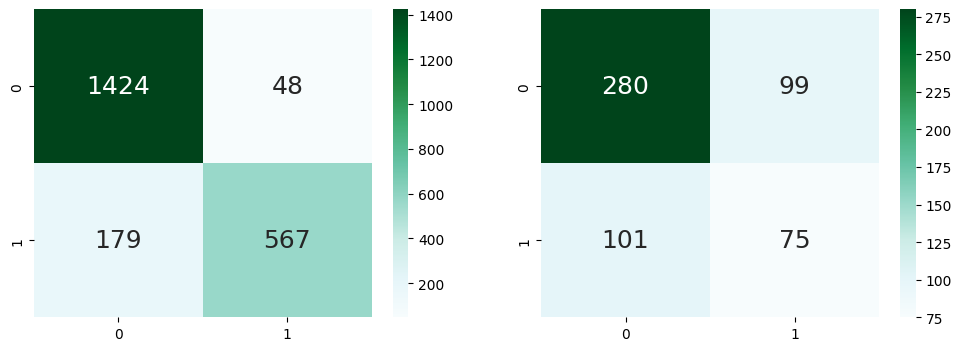

In [26]:
deciTreeC = DecisionTreeClassifier()
deciTreeC. fit(x_train, y_train)

# Predict the outcomes for both the training and testing datasets
y_train_predictions = deciTreeC.predict (x_train)
y_test_predictions = deciTreeC.predict(x_test)

print("Model Performance on Training Set")
print ("Accuracy  \t:",deciTreeC.score(x_train, y_train) )
print ("Precision \t:", precision_score(y_train, y_train_predictions, pos_label=1.0))
print ("Recall    \t:",recall_score(y_train, y_train_predictions, pos_label=1.0))
print ()

print("Model Performance on Test Set")
print ("Accuracy  \t:", deciTreeC. score(x_test, y_test) )
print ("Precision \t:" ,precision_score(y_test, y_test_predictions, pos_label=1.0))
print ("Recall    \t:", recall_score(y_test, y_test_predictions, pos_label=1.0))
print ()

# Plot confusion matrices for both training and testing datasets
f, axes = plt.subplots(1, 2, figsize=(12,4))
sb.heatmap(confusion_matrix(y_train, y_train_predictions),annot =True,fmt=".0f" , annot_kws={"size": 18}, ax = axes [0], cmap ="BuGn")
sb.heatmap(confusion_matrix(y_test, y_test_predictions), annot =True, fmt=".0f" , annot_kws={"size": 18}, ax = axes [1], cmap ="BuGn")

In [27]:
treeDepth = deciTreeC.get_depth()
treeLeavesNumber = deciTreeC.get_n_leaves()

print('Depth of the tree:', treeDepth)
print('Number of leaves in the tree:', treeLeavesNumber)

Depth of the tree: 25
Number of leaves in the tree: 847


In [28]:
train_data_metrics = ['MultiVar(Train)', round(deciTreeC.score(x_train, y_train), 2),
        round(precision_score(y_train, y_train_predictions, pos_label=1.0), 2),
        round(recall_score(y_train, y_train_predictions, pos_label=1.0), 2),
        treeDepth, treeLeavesNumber]
results.append(train_data_metrics) #add into the empty list each time

test_data_metrics = ['MultiVar(Test)', round(deciTreeC.score(x_test, y_test), 2),
        round(precision_score(y_test, y_test_predictions, pos_label=1.0), 2),
        round(recall_score(y_test, y_test_predictions, pos_label=1.0), 2),
         treeDepth, treeLeavesNumber]
results.append(test_data_metrics) #add into the empty list each time

results

[['Age(Train)', 0.5, 0.38, 0.62, 11, 28],
 ['Age(Test)', 0.57, 0.4, 0.67, 11, 28],
 ['Height(Train)', 0.67, 0.58, 0.08, 11, 44],
 ['Height(Test)', 0.66, 0.18, 0.02, 11, 44],
 ['Weight(Train)', 0.68, 0.57, 0.19, 11, 79],
 ['Weight(Test)', 0.68, 0.51, 0.16, 11, 79],
 ['MultiVar(Train)', 0.9, 0.92, 0.76, 25, 847],
 ['MultiVar(Test)', 0.64, 0.43, 0.43, 25, 847]]

### Converting List to PD Data Frame


In [29]:
# Convert the list of results into a DataFrame for better visualization
results_df = pd.DataFrame(results)

# Assign column names to the DataFrame
results_df.columns = ['Scenario', 'Accuracy', 'Precision', 'Recall', 'Tree Depth', 'Number of Leaves']

# Display the DataFrame
results_df

,Scenario,Accuracy,Precision,Recall,Tree Depth,Number of Leaves
0,Age(Train),0.50,0.38,0.62,11,28
1,Age(Test),0.57,0.40,0.67,11,28
2,Height(Train),0.67,0.58,0.08,11,44
3,Height(Test),0.66,0.18,0.02,11,44
4,Weight(Train),0.68,0.57,0.19,11,79
5,Weight(Test),0.68,0.51,0.16,11,79
6,MultiVar(Train),0.90,0.92,0.76,25,847
7,MultiVar(Test),0.64,0.43,0.43,25,847


Based on the Results_DF table above, comparing the test set for the 3 different variables, it shows that Weight (Test) have a higher accuracy as compared to Height (Test) and Age (Test), which are 0.66 and 0.57 respectively. This indicates that physical characteristics can be used to determine the athlete medal classes.

This answers the first question of the project where physical characteristics do have a significant influnce on the athlete's chances of gaining a medal.

The second question is also answered based on the Results_DF table where Weight will play the most significant impact as compared to the other 2 variables.

# Predictions on the men's 400m event at the Tokyo 2020 Olympics

In [30]:
# Dataset for Tokyo 2020 men's 400m finalists
mens_400m_olympics_data = [
    ['Steven Gardiner', 25, 91, 193, 'Y'],  # Gold medalist
    ['Anthony Zambrano', 23, 73, 180, 'Y'],  # Silver medalist
    ['Kirani James', 28, 80, 191, 'Y'],  # Bronze medalist
    ['Michael Cherry', 26, 75, 188, 'N'],  # 4th place
    ['Michael Norman', 23, 77, 183, 'N'],  # 5th place
    ['Isaac Makwala', 35, 80, 188, 'N'],  # 6th place
    ['Liemarvin Bonevacia', 32, 77, 183, 'N'],  # 7th place
    ['Christopher Taylor', 21, 70, 183, 'N'],  # 8th place
]

# Create a DataFrame for the men's 400m event results
df_mens_400m_results = pd.DataFrame(mens_400m_olympics_data)
df_mens_400m_results.columns = ['Name','Age','Weight','Height','Medal']

# Display the DataFrame
df_mens_400m_results

,Name,Age,Weight,Height,Medal
0,Steven Gardiner,25,91,193,Y
1,Anthony Zambrano,23,73,180,Y
2,Kirani James,28,80,191,Y
3,Michael Cherry,26,75,188,N
4,Michael Norman,23,77,183,N
5,Isaac Makwala,35,80,188,N
6,Liemarvin Bonevacia,32,77,183,N
7,Christopher Taylor,21,70,183,N


In [31]:
# Create a new DataFrame for testing purposes, selecting relevant columns
test_data_frame = pd.DataFrame(df_mens_400m_results[["Age", "Weight", "Height"]])

test_data_frame

,Age,Weight,Height
0,25,91,193
1,23,73,180
2,28,80,191
3,26,75,188
4,23,77,183
5,35,80,188
6,32,77,183
7,21,70,183


In [32]:
# Create training data
X_train = df_mens_400m_results[['Age', 'Weight', 'Height']]
y_train = df_mens_400m_results['Medal']

In [33]:
# Create and train the decision tree model
deciTreeC = DecisionTreeClassifier()
deciTreeC.fit(X_train, y_train)

DecisionTreeClassifier()

In [34]:
# Predicting the class using the decision tree model
Tokyo_predicted_outcomes = deciTreeC.predict(test_data_frame)

# Convert the predictions to a DataFrame
Tokyo_predicted_results_df = pd.DataFrame(Tokyo_predicted_outcomes, columns=['Predicted Class'])

Tokyo_predicted_results_df

,Predicted Class
0,Y
1,Y
2,Y
3,N
4,N
5,N
6,N
7,N


In [35]:
# Combine the original DataFrame with the predicted results
Tokyo_final_results_df = pd.concat([df_mens_400m_results, Tokyo_predicted_results_df], axis=1)

Tokyo_final_results_df

,Name,Age,Weight,Height,Medal,Predicted Class
0,Steven Gardiner,25,91,193,Y,Y
1,Anthony Zambrano,23,73,180,Y,Y
2,Kirani James,28,80,191,Y,Y
3,Michael Cherry,26,75,188,N,N
4,Michael Norman,23,77,183,N,N
5,Isaac Makwala,35,80,188,N,N
6,Liemarvin Bonevacia,32,77,183,N,N
7,Christopher Taylor,21,70,183,N,N


Goodness of Fit of Model 	Test Dataset
Accuracy  	: 1.0
Precision 	: 1.0
Recall    	: 1.0



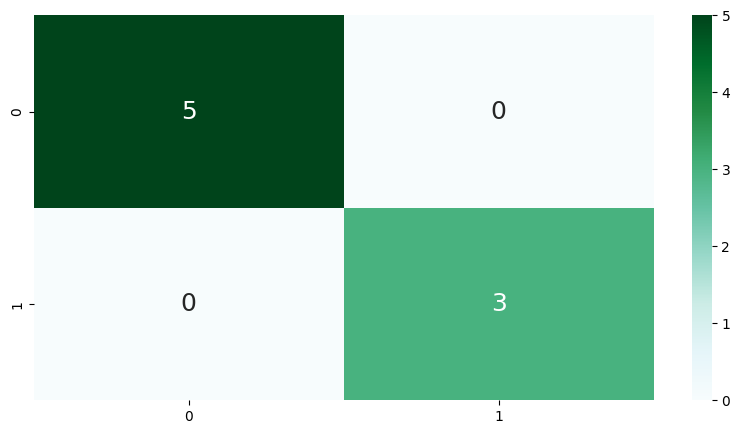

In [36]:
# Extract the target variable (medal) from the original DataFrame
actual_outcomes = pd.DataFrame(df_mens_400m_results["Medal"])

print("Goodness of Fit of Model \tTest Dataset")
print("Accuracy  \t:", deciTreeC.score(test_data_frame, actual_outcomes))
print("Precision \t:", precision_score(actual_outcomes, Tokyo_predicted_results_df, pos_label="Y"))
print("Recall    \t:", recall_score(actual_outcomes, Tokyo_predicted_results_df, pos_label="Y"))
print()

# Plot the confusion matrix
plt.figure(figsize=(10, 5))
conf_matrix = confusion_matrix(actual_outcomes, Tokyo_predicted_results_df)
sb.heatmap(conf_matrix, annot=True, fmt=".0f", annot_kws={"size": 18}, cmap="BuGn")
plt.show()